# Практическая работа №3
# КЛАССИФИКАЦИЯ ДАННЫХ НА ОСНОВЕ SVM-АЛГОРИТМА

### 1) Импортируем необходимые для работы библиотеки

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### 2) Импортируем датасет

In [5]:
path = "https://datahub.io/machine-learning/spectrometer/r/spectrometer.csv"

In [6]:
dataset = pd.read_csv(path)
dataset

,LRS-name,LRS-class,ID-type,Right-Ascension,Declination,Scale_Factor,Blue_base_1,Blue_base_2,Red_base_1,Red_base_2,...,red-band-flux_40,red-band-flux_41,red-band-flux_42,red-band-flux_43,red-band-flux_44,red-band-flux_45,red-band-flux_46,red-band-flux_47,red-band-flux_48,red-band-flux_49
0,12043-6225,28,2,12.073,-62.428,1.250000e-16,2498,2630,1740,1783,...,1669.91490,2039.33590,1891.61340,1040.11570,1211.53580,1767.62330,1146.94710,1392.47450,1278.99450,1440.48200
1,12063-6259,85,3,12.106,-62.987,2.970000e-16,1086,1241,421,674,...,6879.97070,7056.40530,6817.42970,6682.79440,6988.59770,7084.03600,6971.78300,7015.57470,6962.22000,6263.44000
2,12073-6233,95,3,12.123,-62.554,3.130000e-15,481,270,63,451,...,7048.21630,6998.41550,6669.61100,6551.05900,6679.77150,6564.26300,6309.63960,5954.38800,5337.88870,4638.52440
3,12148-6741,18,4,12.247,-67.683,1.730000e-15,191,232,103,103,...,523.37290,507.43262,446.32816,417.10430,454.29834,448.98490,459.61176,409.13416,366.62670,332.08942
4,12216-6218,42,0,12.360,-62.303,2.180000e-16,1401,1268,1042,1063,...,1083.34880,664.50507,909.68350,837.53380,862.60760,693.25110,890.75964,473.78302,658.46140,725.74945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,23491+6243,43,2,23.819,62.732,2.220000e-16,1315,1495,843,810,...,931.53430,883.77320,998.42004,735.88940,1088.73080,687.22630,686.34280,934.49110,933.59190,501.37790
527,23496+6131,27,4,23.827,61.526,1.250000e-15,238,280,99,142,...,1463.34830,1423.84380,1320.31090,1279.61380,1284.83720,1236.90540,1208.31240,1203.89100,1099.19290,1037.99740
528,23528+4821,22,4,23.881,48.360,5.740000e-16,577,568,416,431,...,1099.62080,1025.80850,795.37830,767.25446,802.76160,843.16656,642.11680,824.46655,703.36536,649.15760
529,23541+7031,31,3,23.902,70.526,4.120000e-16,995,1177,463,398,...,1981.20740,1970.82130,1748.14440,1757.16270,1724.30970,1721.34130,1546.44600,1677.99240,1601.73520,1470.15520


### 3) Первичный анализ данных

In [7]:
ps = pd.Series([dataset.loc[dataset['ID-type'] == 1].Class.count(), dataset.loc[dataset['Class'] == 0].Class.count()])
ps.plot.pie(figsize=(6, 6))

AttributeError: 'DataFrame' object has no attribute 'Class'

In [6]:
print(ps)

0    1813
1    2788
dtype: int64


Как мы можем заметить распределение классов в датасете неравномерное, но не критическое.
Теперь посмотрим, от каких коэффициентов больше всего зависит класс объекта. Определим корреляцию для каждого из параметров.

In [7]:
dataset.corr()['Class'][:-1]


1     0.126208
2    -0.030224
3     0.196988
4     0.057371
5     0.241920
6     0.232604
7     0.332117
8     0.206808
9     0.231551
10    0.138962
11    0.234529
12    0.007741
13    0.132927
14    0.060027
15    0.195902
16    0.263215
17    0.263204
18    0.204208
19    0.273651
20    0.189761
21    0.383234
22    0.091860
23    0.334787
24    0.216111
25   -0.256723
26   -0.232968
27   -0.183404
28   -0.158800
29   -0.133523
30   -0.171095
31   -0.126912
32   -0.114214
33   -0.119931
34   -0.112754
35   -0.149225
36   -0.136134
37   -0.178045
38   -0.031035
39   -0.122831
40   -0.064801
41   -0.097375
42   -0.136615
43   -0.135664
44   -0.094594
45   -0.140408
46   -0.146138
47   -0.044679
48   -0.084020
49   -0.059630
50   -0.089672
51   -0.064709
52    0.241888
53    0.323629
54    0.065067
55    0.109999
56    0.216097
57    0.249164
Name: Class, dtype: float64

Как мы можем заметить, нет параметров, которые сильно коррелируют со значением класса объекта.

### 4) Подготовка данных для обучения модели

Отделяем параметры от значения класса

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Теперь разбиваем выборку на тренировочную и тестовую в соотношении 60/40

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

Регулируем масштаб значений параметров так, чтобы каждый параметр имел одинаковый вес.

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 5) Обучение SVM модели

In [11]:
clf = svm.SVC(C=1, kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
clf.score(X_test, y_test)

0.928843020097773

### 6) Улучшаем результат. Подбираем оптимальное ядро и параметр регуляризации.

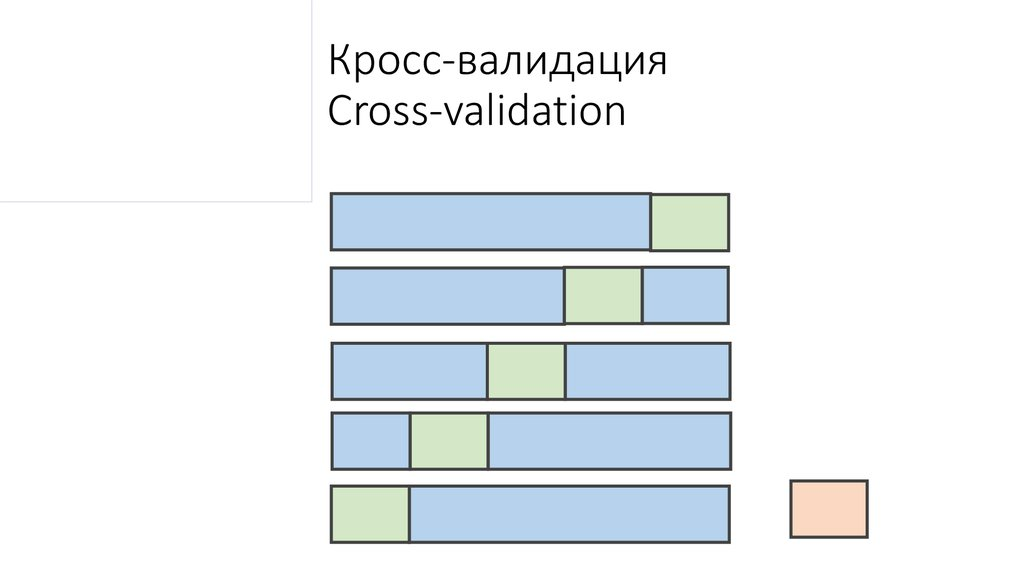

Для поиска оптимальных параметров будем использовать кросвалидацию. 
Для этого разделм тренировочную выборку на 3 части: 2 - тренировочные и 1 - валидационная.
Причём каждая из часей будет использована и как тренировочная, и как валидационная.

In [14]:
svc = svm.SVC()
param = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [i * 0.1 for i in range(1, 16)]}
gscv =  GridSearchCV(svc, param, cv=3, n_jobs=-1, verbose=1)
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                               0.6000000000000001, 0.7000000000000001, 0.8, 0.9,
                               1.0, 1.1, 1.2000000000000002, 1.3,
                               1.4000000000000001, 1.5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [16]:
gscv.best_params_

{'C': 1.2000000000000002, 'kernel': 'linear'}

### 7) Итоговая оценка результата обучения

In [17]:
best_c = gscv.best_estimator_

In [18]:
y_pred = best_c.predict(X_test)

In [19]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1047   56]
 [  74  664]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1103
           1       0.92      0.90      0.91       738

    accuracy                           0.93      1841
   macro avg       0.93      0.92      0.93      1841
weighted avg       0.93      0.93      0.93      1841

Accuracy: 0.9293862031504617


**Итоговая точность: 92,94%**